<a href="https://colab.research.google.com/github/rogeriodelphi/trader_esportivo_analises/blob/main/FutPythonTrader_An%C3%A1lises_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
# Baixando a panilha do Football Data
df1 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2223/D1.csv')
df2 = pd.read_csv('https://www.football-data.co.uk/mmz4281/2324/D1.csv')
df = [df1, df2]
df = pd.concat(df)

In [3]:
# Selecionando as colunas que serão utilizadas
df = df[['Date','HomeTeam','AwayTeam','B365H','B365D','B365A','FTHG','FTAG','FTR']]

#Renomeando as Colunas
df.columns = ['Data','Casa','Visitante','Odds_Casa','Odds_Empate','Odds_Visitante','Gols_casa','Gols_Vititante','Resultado']

In [4]:
# Visualizando o DataFrame
df

,Data,Casa,Visitante,Odds_Casa,Odds_Empate,Odds_Visitante,Gols_casa,Gols_Vititante,Resultado
0,05/08/2022,Ein Frankfurt,Bayern Munich,6.00,5.00,1.50,1,6,A
1,06/08/2022,Augsburg,Freiburg,3.30,3.50,2.15,0,4,A
2,06/08/2022,Bochum,Mainz,3.20,3.40,2.20,1,2,A
3,06/08/2022,M'gladbach,Hoffenheim,2.05,4.20,3.00,3,1,H
4,06/08/2022,Union Berlin,Hertha,1.72,3.75,4.50,3,1,H
...,...,...,...,...,...,...,...,...,...
138,20/12/2023,Ein Frankfurt,M'gladbach,1.83,4.00,3.80,2,1,H
139,20/12/2023,Heidenheim,Freiburg,2.80,3.60,2.38,3,2,H
140,20/12/2023,Leverkusen,Bochum,1.17,8.00,15.00,4,0,H
141,20/12/2023,Stuttgart,Augsburg,1.36,5.25,7.50,3,0,H


In [5]:
# Ajustando o índice
df.reset_index(inplace=True, drop=True)
df.index = df.index.set_names(['Nº do Jogo'])
df = df.rename(index=lambda x: x + 1)

In [6]:
# Visualizando o DataFrame
df

,Data,Casa,Visitante,Odds_Casa,Odds_Empate,Odds_Visitante,Gols_casa,Gols_Vititante,Resultado
Nº do Jogo,,,,,,,,,
1,05/08/2022,Ein Frankfurt,Bayern Munich,6.00,5.00,1.50,1,6,A
2,06/08/2022,Augsburg,Freiburg,3.30,3.50,2.15,0,4,A
3,06/08/2022,Bochum,Mainz,3.20,3.40,2.20,1,2,A
4,06/08/2022,M'gladbach,Hoffenheim,2.05,4.20,3.00,3,1,H
5,06/08/2022,Union Berlin,Hertha,1.72,3.75,4.50,3,1,H
...,...,...,...,...,...,...,...,...,...
445,20/12/2023,Ein Frankfurt,M'gladbach,1.83,4.00,3.80,2,1,H
446,20/12/2023,Heidenheim,Freiburg,2.80,3.60,2.38,3,2,H
447,20/12/2023,Leverkusen,Bochum,1.17,8.00,15.00,4,0,H


In [10]:
# Perdas e Lucros - Back Linear
win_Back_H = 1 * df.Odds_Casa - 1
win_Back_D = 1 * df.Odds_Empate - 1
win_Back_A = 1 * df.Odds_Visitante - 1
lose = -1

df['Back_Casa'] = win_Back_H.where(df.Resultado == 'H', other=lose)
df['Back_Empate'] = win_Back_D.where(df.Resultado == 'D', other=lose)
df['Back_Visitante'] = win_Back_A.where(df.Resultado == 'A', other=lose)


<Axes: title={'center': 'Back Casa'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

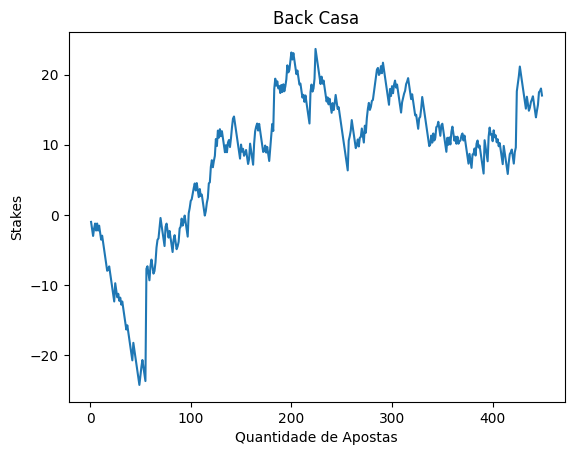

In [20]:
# Back Casa
df['BackCasa_acu'] = df.Back_Casa.cumsum()
df.BackCasa_acu.plot(title='Back Casa', xlabel='Quantidade de Apostas', ylabel='Stakes')

In [ ]:
# Back Empate
df['BackEmpate_acu'] = df.Back_Empate.cumsum()
df.BackEmpate_acu.plot(title='Back Empate', xlabel='Quantidade de Apostas', ylabel='Stakes')

<Axes: title={'center': 'Back Visitante'}, xlabel='Quantidade de Apostas', ylabel='Stakes'>

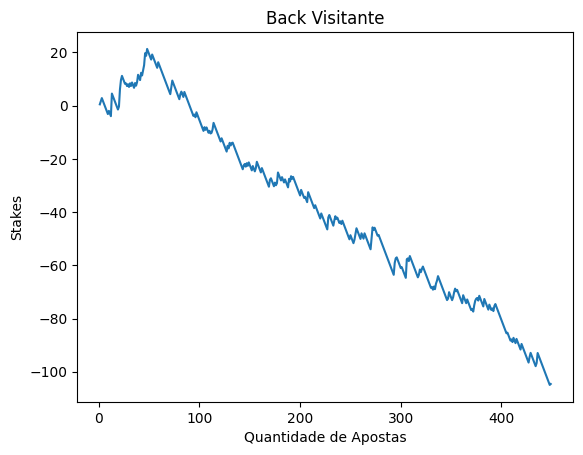

In [19]:
# Back Visitante
df['BackVisitante_acu'] = df.Back_Visitante.cumsum()
df.BackVisitante_acu.plot(title='Back Visitante', xlabel='Quantidade de Apostas', ylabel='Stakes')